## Census Income Dataset

## Problem Statement :
The dataset given below contains the census information about the attributes of individuals as the features and their income as the target. The task is to predict whether a person makes over $50K a year or not.

## About the dataset:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  

The data has 1032 instances and 15 features. For your information the target variable `Income` has already been label encoded.
1 indicates the income is greater than or equal to 50K. 0 indicates the income is less than 50K. Below is a brief about the features in the dataset.

|Features|Description|
|-----|-----|
|age|Age of the person|
|Workclass|Categorical variable having 8 categories each denoting the type of employment|
|fnlwgt|final weight. |
|education|Categorical variable with 16 categories each denoting the qualification of the person.|
|education-num|number of years of education|
|marital-status|Categorical variable with 7 categories|
|occupation|Categorical variable with 14 categories each denoting the type of occupation of the individual|
|relationship|Categorical variable with 6 categories.|
|race|Categorical variable with 5 categories each denoting the ethnicity of the individual|
|sex|Gender of the person|
|capital-gain|Continuous| 
|capital-loss|Continuous|
|hours-per-week|Working hours per week|
|native-country|Categorical|
|Income|Target variable. 1 indicates >=50k. 0 indicates <50K|



### Reading the data using pandas module.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv('./data/adult_preprocessed.csv',index_col=0)

In [3]:
pd.set_option('display.max_columns',100)

In [4]:
dataframe.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [5]:
dataframe.columns

Index(['age', 'Workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [6]:
dataframe['Workclass'].value_counts()



 Private             766
 Self-emp-not-inc     90
 Local-gov            76
 State-gov            40
 Self-emp-inc         38
 Federal-gov          22
Name: Workclass, dtype: int64

In [29]:
#create a new columns: workclass_2 and gov categories

dataframe['Workclass_2'] = dataframe['Workclass'].apply(lambda x:'gov' if x[-3:]=='gov' else x)
dataframe['Workclass_2'].value_counts()


 Private             766
gov                  138
 Self-emp-not-inc     90
 Self-emp-inc         38
Name: Workclass_2, dtype: int64

In [41]:
dataframe['Workclass_3'] = dataframe['Workclass_2'].apply(lambda x:'Self-emp' if x[-3:]=='inc' else x)
dataframe['Workclass_3'].value_counts()

 Private    766
gov         138
Self-emp    128
Name: Workclass_3, dtype: int64

In [9]:
a ='Self-emp-not-inc'
a[:8]

'Self-emp'

In [11]:
a ='Self-emp-not-inc'
if ((a.strip() in ['Self'])==True):
    print("True")
else:
    print("False")

False


In [ ]:
# other way alse way 2
dataframe['Workclass_2'] = dataframe['Workclass'].apply(lambda x:'gov' 
                                                        if ((x.strip() in ['Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov'])== true)
                                                         else x.strip())
dataframe['Workclass_2'].value_counts()
dataframe['Workclass_2'].head()

In [ ]:
# other way alse way 2
dataframe['Workclass_2'] = df.replace(to_replace =['Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov'], 
                 value ="gov") 

### Check for null values and get a summary of all the columns in the dataset

In [7]:
# Check for null values
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1119
Data columns (total 15 columns):
age               1032 non-null int64
Workclass         1032 non-null object
fnlwgt            1032 non-null int64
education         1032 non-null object
education-num     1032 non-null int64
marital-status    1032 non-null object
occupation        1032 non-null object
relationship      1032 non-null object
race              1032 non-null object
sex               1032 non-null object
capital-gain      1032 non-null int64
capital-loss      1032 non-null int64
hours-per-week    1032 non-null int64
native-country    1032 non-null object
Income            1032 non-null int64
dtypes: int64(7), object(8)
memory usage: 129.0+ KB


In [8]:
dataframe.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [9]:
# Get a summary of the columns in the dataset
dataframe.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395,0.246124
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603,0.430961
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000,1.000000


In [10]:
dataframe['Income'].value_counts()

0    778
1    254
Name: Income, dtype: int64

### For further analysis split to bring all the continuous variables together and categorical variables together.

In [11]:
# Seperate continuous variables and categorical variables
dataframe_con = dataframe.select_dtypes(include = np.number)
dataframe_cat = dataframe.select_dtypes(exclude = np.number)
# print(dataframe_cat)

###  Plotting a stacked bar chart, have an estimate of the number of people with income above and below 50K with respect to each of the categorical features

In [50]:
dataframe.groupby('Workclass_2')['Income'].value_counts()

Workclass_2        Income
 Private           0         602
                   1         164
 Self-emp-inc      1          23
                   0          15
 Self-emp-not-inc  0          67
                   1          23
gov                0          94
                   1          44
Name: Income, dtype: int64

In [51]:
dataframe.groupby('Workclass_2')['Income'].value_counts().unstack()

Income,0,1
Workclass_2,,
Private,602,164
Self-emp-inc,15,23
Self-emp-not-inc,67,23
gov,94,44


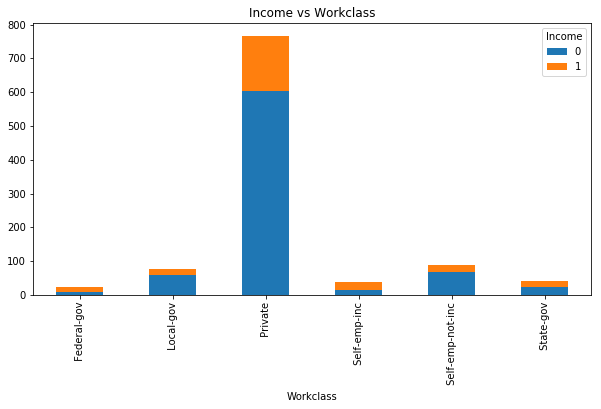

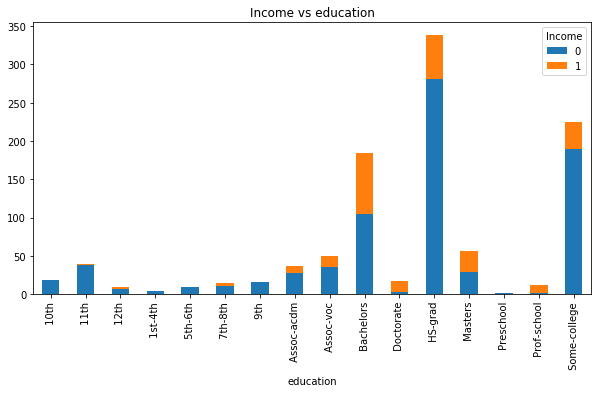

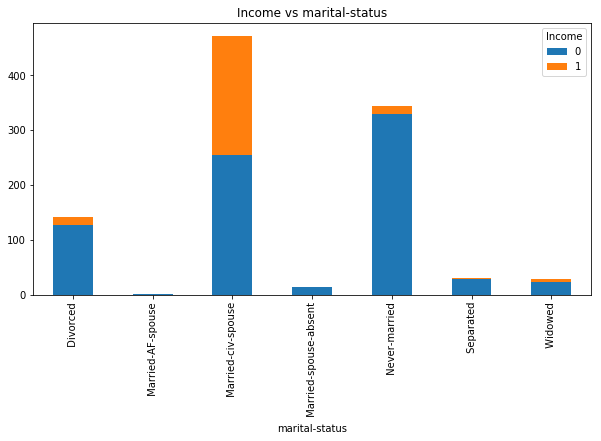

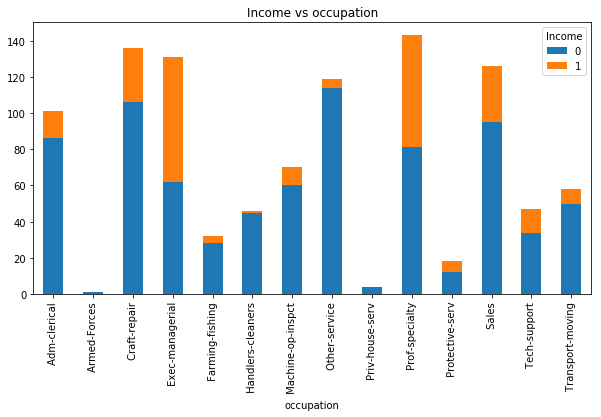

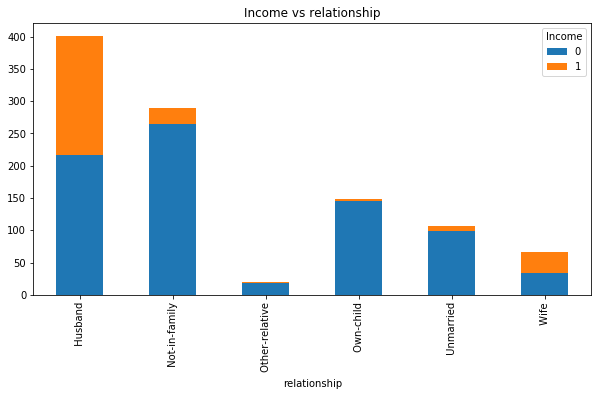

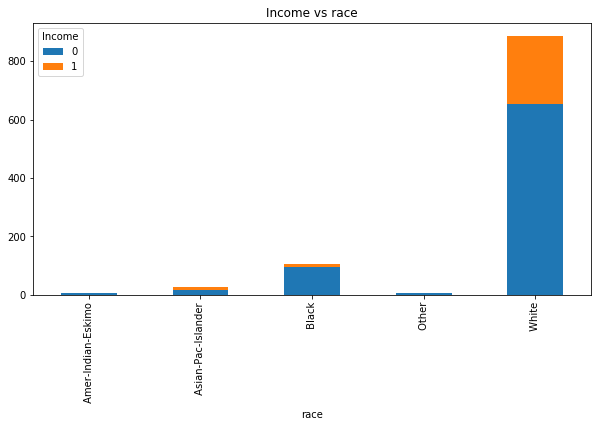

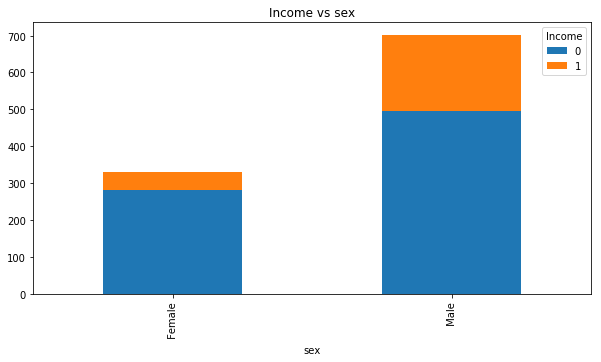

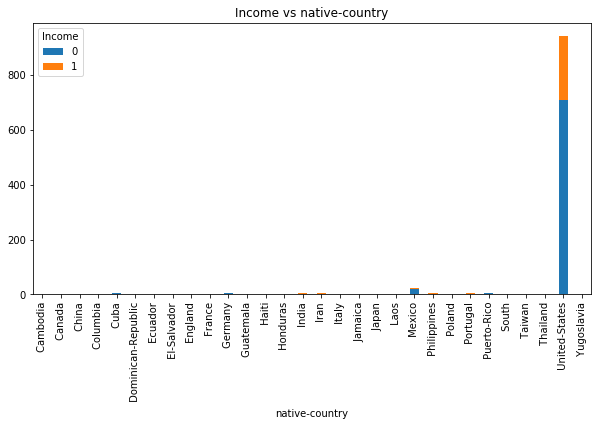

In [13]:
import matplotlib.pyplot as plt
for i in dataframe_cat:
    dataframe.groupby(i)['Income'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,5))
    plt.title('Income vs '+i)

### What can you infer from the above visualisations ?

### Plot a histogram for all the continuous variables to check for skewness

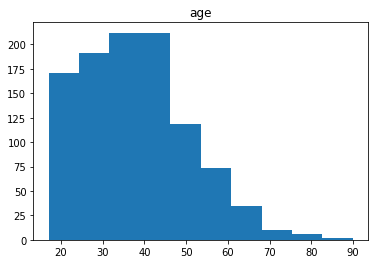

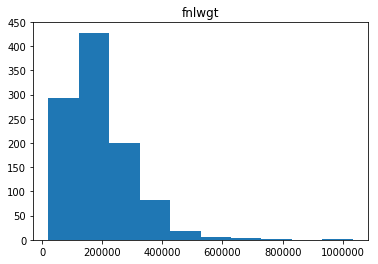

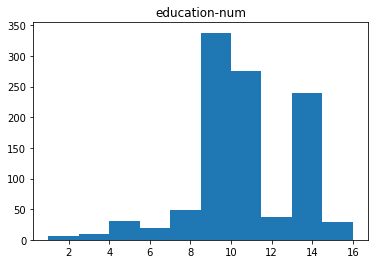

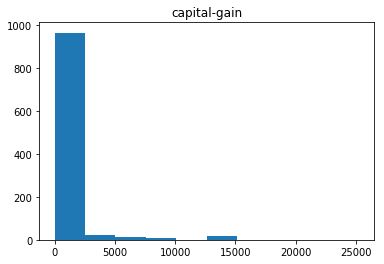

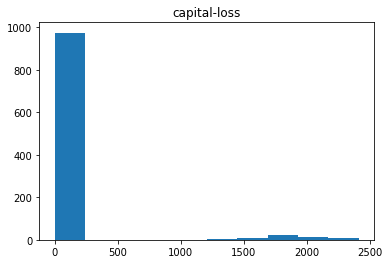

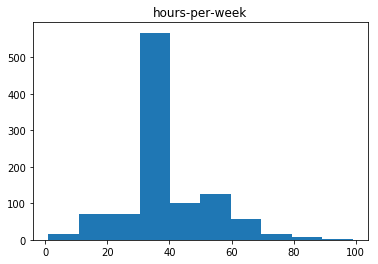

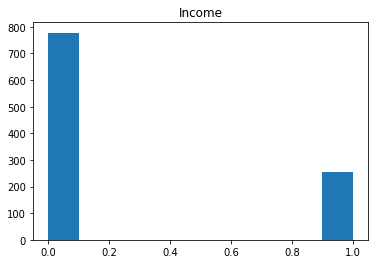

In [14]:
for i in dataframe_con:
    plt.title(i)
    plt.hist(dataframe_con[i])
    plt.show()

### Majority of values in capital-gain and capital-loss are zeros. So remove the columns

In [15]:
dataframe_con.drop(['capital-gain','capital-loss'],1,inplace=True)

### Check for skewness in the continuous data

In [16]:
skewness = pd.DataFrame(data={'name':list(dataframe_con),'skew':skew(dataframe_con)})
skewness

,name,skew
0,age,0.616053
1,fnlwgt,1.393756
2,education-num,-0.302202
3,hours-per-week,0.163186
4,Income,1.178758


### The column `fnlwgt` is a highly right skewed column. Remove the skewness using a log transform and then check if the skewness has been removed by plotting its histogram

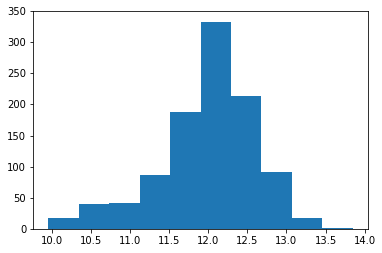

In [17]:
dataframe_con['fnlwgt'] = np.log1p(dataframe_con['fnlwgt'])

plt.hist(dataframe_con['fnlwgt']);

### Check for the pearson correlation between the continuous variables by plotting a heatmap

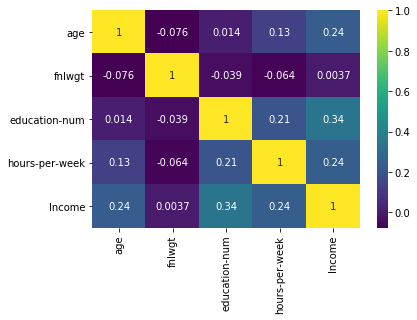

In [19]:
# Check for correlation between continuous variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(dataframe_con.corr(),cmap='viridis',annot=True)

### Label Encode all the categorical variables

In [20]:
# Label Encode Categorical variables

le = LabelEncoder()
for col in dataframe_cat:
    dataframe_cat[col] = le.fit_transform(dataframe_cat[col])
     

dataframe_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


### Concatenate both the continuous and categorical dataframes

In [21]:
new_dataframe = pd.concat([dataframe_con,dataframe_cat],axis=1,ignore_index=True)

new_dataframe.columns = ['age','fnlwgt','education-num','hours-per-week','Income','Workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [22]:
new_dataframe.head()

,age,fnlwgt,education-num,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,11.258253,13,40,0,5,9,4,0,1,4,1,28
1,50,11.330348,13,13,0,4,9,2,3,0,4,1,28
2,38,12.281398,9,40,0,2,11,0,5,1,4,1,28
3,53,12.366157,7,40,0,2,1,2,5,0,2,1,28
4,28,12.732013,13,40,0,2,9,2,9,5,2,0,4


In [23]:
columns = list(new_dataframe)
columns[4],columns[-1] = 'native-country','Income'   #swapping elements in list

In [24]:
new_dataframe = new_dataframe[columns]

In [25]:
new_dataframe.head()

,age,fnlwgt,education-num,hours-per-week,native-country,Workclass,education,marital-status,occupation,relationship,race,sex,Income
0,39,11.258253,13,40,28,5,9,4,0,1,4,1,0
1,50,11.330348,13,13,28,4,9,2,3,0,4,1,0
2,38,12.281398,9,40,28,2,11,0,5,1,4,1,0
3,53,12.366157,7,40,28,2,1,2,5,0,2,1,0
4,28,12.732013,13,40,4,2,9,2,9,5,2,0,0


In [27]:
new_dataframe.describe()

,age,fnlwgt,education-num,hours-per-week,native-country,Workclass,education,marital-status,occupation,relationship,race,sex,Income
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,37.954457,11.994265,10.221899,40.706395,26.935078,2.211240,10.386628,2.601744,6.279070,1.484496,3.684109,0.679264,0.246124
std,12.825353,0.627921,2.501636,11.736603,4.083114,0.921744,3.652821,1.495975,4.000925,1.644953,0.810347,0.466986,0.430961
min,17.000000,9.960577,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,11.657720,9.000000,40.000000,28.000000,2.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000
50%,37.000000,12.104635,10.000000,40.000000,28.000000,2.000000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000
75%,46.000000,12.413874,13.000000,45.000000,28.000000,2.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000
max,90.000000,13.848194,16.000000,99.000000,29.000000,5.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,1.000000


In [28]:
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1119
Data columns (total 13 columns):
age               1032 non-null int64
fnlwgt            1032 non-null float64
education-num     1032 non-null int64
hours-per-week    1032 non-null int64
native-country    1032 non-null int32
Workclass         1032 non-null int32
education         1032 non-null int32
marital-status    1032 non-null int32
occupation        1032 non-null int32
relationship      1032 non-null int32
race              1032 non-null int32
sex               1032 non-null int32
Income            1032 non-null int64
dtypes: float64(1), int32(8), int64(4)
memory usage: 80.6 KB


### Split into features and target

In [29]:
X = new_dataframe.iloc[:,:-1]
y = new_dataframe.iloc[:,-1]

### Fit a StandardScaler on the features

In [30]:
# Fitting a Standard Scaler 

ss = StandardScaler()
X = ss.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Convert array to a dataframe

In [31]:
X = pd.DataFrame(X,columns=columns[:-1])

In [32]:
X.head()

,age,fnlwgt,education-num,hours-per-week,native-country,Workclass,education,marital-status,occupation,relationship,race,sex
0,0.081561,-1.172711,1.111052,-0.060217,0.260938,3.026993,-0.379789,0.935132,-1.570166,-0.294678,0.390011,0.687155
1,0.939653,-1.057839,1.111052,-2.361827,0.260938,1.941567,-0.379789,-0.402437,-0.819975,-0.902893,0.390011,0.687155
2,0.003553,0.457498,-0.488677,-0.060217,0.260938,-0.229286,0.167999,-1.740006,-0.319849,-0.294678,0.390011,0.687155
3,1.173678,0.592547,-1.288541,-0.060217,0.260938,-0.229286,-2.570939,-0.402437,-0.319849,-0.902893,-2.079263,0.687155
4,-0.776531,1.175477,1.111052,-0.060217,-5.619778,-0.229286,-0.379789,-0.402437,0.680405,2.138182,-2.079263,-1.455275


### Split into train and validation data

In [33]:
 

X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=42,test_size=0.2)

### Fit a logistic regression model

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_valid)

### Checking the accuracy, f1_score, confusion matrix

In [35]:
print('Accuracy is {}'.format(accuracy_score(y_valid,y_pred)))
print('F1-score is {}'.format(f1_score(y_valid,y_pred)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_valid,y_pred)))

Accuracy is 0.8164251207729468
F1-score is 0.45714285714285713
Confusion Matrix is

[[153  11]
 [ 27  16]]


### Perform hyperparameter tuning using GridSearch

In [36]:
params = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100]}
grid_search = GridSearchCV(estimator=logreg, param_grid=params,scoring='f1',cv=10)
grid_search.fit(X_train,y_train)
y_pred_grid_search = grid_search.predict(X_valid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Find the best parameters and the metrics after grid search

In [37]:
grid_search.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [38]:
print('Accuracy after grid search is {}'.format(accuracy_score(y_valid,y_pred_grid_search)))
print('F1-score after grid search is {}'.format(f1_score(y_valid,y_pred_grid_search)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_valid,y_pred_grid_search)))


Accuracy after grid search is 0.8019323671497585
F1-score after grid search is 0.5060240963855422
Confusion Matrix is

[[145  19]
 [ 22  21]]
